# CSE/ISE 337 Assignment 4
**Due date: 23:59 on Dec 12, 2024**

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This assignment contains two parts.  
```
Problem 1 - Linear regression model for a fish market(50 points)
          You will create a linear regression model for data about a fish market.
          You can use the code from the class lectures on Pandas and Linear Regression,
          especially to clean the data and identify the correlations.
Problem 2 - Neural Network for a car market(50 points)
          You will create a Neural Network using Pytorch for data about a car market.
          You can use much of the code from the class lecture on PyTorch.
          For this problem, you need to understand and study the model covered in the class.
```







<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2 [50]:
This exercise will guide you through the process of creating a Neural Network using Pytorch for data about a car market.  You can use much of the code from the class lecture on PyTorch.  For this problem,  you need to understand and study the model covered in the class.

Please **KEEP** the output of each cell before submission, we will grade mainly based on them; otherwise, the grading process could be delayed.

## Mount google drive to the project

`gdrive/MyDrive/` is like a root directory of the google colab machine. Let's change the current working directory of google colab to the directory of assignment 4. This step is optional for student working in a local machine.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
HW4_ROOT_PATH = '/gdrive/MyDrive/' + 'PATH/TO/ASSIGMENT4/' # TODO: Replace PATH/TO/ASSIGNMENT4, {last name}_{first name}_{sbu id}_hw4 for example
%cd -q $HW4_ROOT_PATH
%ls
# At least, there should be Fish.csv, cars.csv, Problem1.ipynb and Problem2.ipynb in your root path.

carbody_model.pt  Fish.csv     info.txt        Problem2.ipynb
cars.csv          HW5_ML.docx  Problem1.ipynb  Solutions/


## Import Packages

Following packages are what we will use throughout this exercise. Please do not use other packages.

In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the Data [5]

Let's load our data and see what it looks like. Open `cars.csv` as DataFrame and printout its head.

In [6]:
#########################
#### TODO: Load cars.csv into DataFrame and printout its head.

df = pd.read_csv("cars.csv")
print(df.head())

#########################

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

## Correlation Analysis [5]

We plan to train our model to classify car body (e.g. convertible) of a car, given other information about it. Having a look at `cars.csv`, there are many columns. More features are generally useful, but sometimes does not help and rather harm the model training.

Let's analyze which features are useful to classify car body by looking at correlation between features and use them to train our model.

What are the features you chose? Write your answers below.
* Feature 1: doornumber
* Feature 2: carlength
* Feature 3: carheight
* Feature 4: highwaympg
* Feature 5: wheelbase


<Axes: >

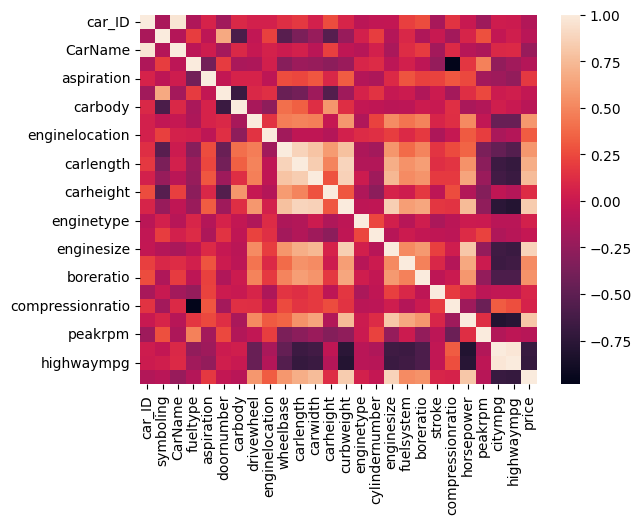

In [78]:
# Identify categorical columns and change them to numerical value.
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

#########################
##### TODO: Draw heatmap.
correlation=df.corr()
sns.heatmap(correlation)

#########################

## Prepare Dataset [10]

We see from the correlation heatmap which features are useful. You will select _five features_ and will prepare dataset to train the model with. Try to pick salient features to get high accuracy for your classification model. There is no correct answer to this, meaning _you see have different output to the provided expected output_.

Split the dataset into train and test set. The size of the test set should be set to 20% of the entire dataset.

Note that pandas DataFrame needs to be converted to torch Tensor to be used for training and evaluation.




In [94]:
#########################
#### TODO: Pick five features.
X = df[["doornumber","carlength","carheight","highwaympg","wheelbase"]]
y = df["carbody"]
#########################

#########################
#### TODO: Split into train/test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2,random_state=20 )

#########################
#########################
#### TODO: Convert train/test set to torch Tensor object.

print(size)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.LongTensor(y_train.values)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.LongTensor(y_test.values)
#########################
X_train.shape, X_test.shape, y_train.shape, y_test.shape



5


(torch.Size([164, 5]),
 torch.Size([41, 5]),
 torch.Size([164]),
 torch.Size([41]))

## Modeling [10]

This is the highlight of the exercise. Let's create a NN model. There should be input layer, output layer, and three hidden layers. You can choose any activation, and note that layers should be interleaved with activation function to provide non-linearity to the model. The shape of input layer depend on the number of features you've selected from the data, and that of output layer depends on the number of classes in your data. Further model design is up to you.


In [95]:

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        #########################
        #### TODO: DEFINE MODEL ARCHITECTURE
        super().__init__()
        self.fc1= nn.Linear(5,5)
        self.fc2= nn.Linear(5,5)
        self.fc3= nn.Linear(5,5)
        self.out= nn.Linear(5,5)

        #########################


    def forward(self,x):
      #########################
      #### TODO: DEFINE FORWARD PROPAGATION
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

      #########################
        return x


## Training [10]

Now we have all the receipe to train the model. Let's initialize the model, select criterion (loss function), select optimizer, set other hyperparameters, and train.

Within the training loop, you will forward/back propagate the model. Be careful to reset every update when updating the gradient. Also, keep the history of loss as you'll have to plot after the training.



In [101]:
#########################
#### TODO: Initialize model, criterion, optimizer, epochs, and list to keep losses.
model = Model()
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
losses = []
#########################

for i in range(epochs):
  #########################
  #### TODO: Train model.
  y_pred = model.forward(X_train)
  loss =criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0 :
    print( f'Epoch: {i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #########################

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

Model(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=5, bias=True)
)
Epoch: 0 and loss: 5.395194053649902
Epoch: 0 and loss: 5.395194053649902
Epoch: 10 and loss: 1.5083953142166138
Epoch: 10 and loss: 1.5083953142166138
Epoch: 20 and loss: 1.2656337022781372
Epoch: 20 and loss: 1.2656337022781372
Epoch: 30 and loss: 1.2274296283721924
Epoch: 30 and loss: 1.2274296283721924
Epoch: 40 and loss: 1.216424584388733
Epoch: 40 and loss: 1.216424584388733
Epoch: 50 and loss: 1.2071242332458496
Epoch: 50 and loss: 1.2071242332458496
Epoch: 60 and loss: 1.1990262269973755
Epoch: 60 and loss: 1.1990262269973755
Epoch: 70 and loss: 1.1924687623977661
Epoch: 70 and loss: 1.1924687623977661
Epoch: 80 and loss: 1.1863003969192505
Epoch: 80 and loss: 1.1863003969192505
Epoch: 90 and loss: 1.1800123453140259
Epoch: 90 and loss: 1.18

## Plot Loss Graph [5]
Often times, we want to visualize whether our model was trained properly. One of the methods is to plot loss graph. Plot the x-y graph where x axis is `Epoch` and y axis is `Training loss`. The training loss should decrease throughout the training process.

Text(0.5, 0, 'epoch')

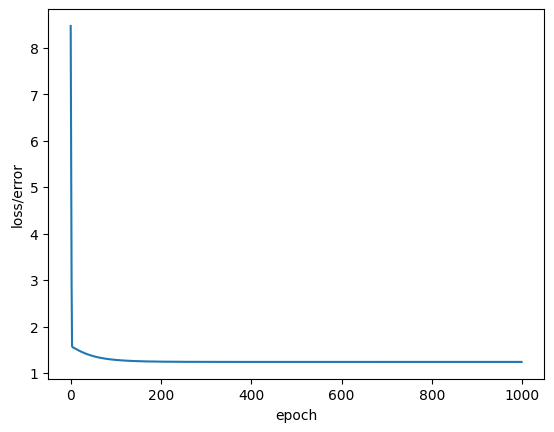

In [97]:
#########################
#### TODO: Plot loss history

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")
#########################

## Evaluate and Save Model [5]

We trained our model with the training set. Let's evaluate our model performance using the test set. Compute classification accuracy of our model.
You need to get above 50% classification accuracy to receive a full credit.

If we are happy about the result, let's save and name the model as `carbody_model.pt`.


In [102]:
#########################
#### TODO: Compute accuracy.

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct answers!')
accuracy = correct/len(X_test)
#########################
print(f"Accuracy: {accuracy}")


1.) tensor([ -0.9351,  -0.4667,   1.4432,   0.3551, -10.0058]) 	 3
2.) tensor([ -0.6051,   0.0423,   2.3188,   0.2264, -14.9058]) 	 3
3.) tensor([-3.9045, -3.9789, -1.4241,  1.7073,  1.2490]) 	 4
4.) tensor([ -0.6066,  -0.0572,   1.8345,   0.2194, -11.8035]) 	 2
5.) tensor([-3.3833, -3.3715, -0.7439,  1.3786, -1.2832]) 	 2
6.) tensor([-3.6755, -3.7298, -1.0625,  1.4998,  0.1265]) 	 3
7.) tensor([-3.6827, -3.7531, -1.1413,  1.5017,  0.6163]) 	 3
8.) tensor([-3.3875, -3.4234, -1.1969,  1.4655,  1.0456]) 	 4
9.) tensor([-3.4844, -3.5428, -1.1536,  1.4436,  0.9537]) 	 3
10.) tensor([-3.6498, -3.7030, -1.3248,  1.5981,  1.1679]) 	 3
11.) tensor([-3.0959, -3.0008, -0.3399,  1.2608, -3.2518]) 	 3
12.) tensor([ -0.9987,  -0.5313,   1.4403,   0.3826, -10.1255]) 	 2
13.) tensor([-3.4302, -3.4869, -1.0808,  1.3935,  0.7753]) 	 3
14.) tensor([ -1.1937,  -0.7139,   1.5069,   0.4679, -10.9742]) 	 3
15.) tensor([-1.2595, -0.8244,  1.2881,  0.4929, -9.7136]) 	 2
16.) tensor([-3.1739, -3.1384, -0.6329,

In [ ]:
#########################
#### TODO: Save state dict of the trained model.
torch.save(model.state_dict(), 'carbody_model.pt')
#########################

## Submission guidelines
---
Plagiarism: plagiarism is strictly forbidden.   
Note: Please be advised that uploading your homework assignments to public platforms, such as GitHub, is strictly prohibited. Sharing your homework solutions in this manner (even after the course completion) constitutes a violation of academic integrity and will be treated as such.


### Overall submission

Before preparing the **{last name}\_{first name}\_{sbu id}_hw4.zip** for the BrightSpace submision, you will need to create ***drive_url.txt*** and put it in your zip file. This file will contain the Google drive URL `https://drive.google.com/drive/folders/FOLDER_ID?usp=drive_link` for the root working directory. You can create it by **right-clicking** the root working folder and select **share->share**.
Permit the grading TAs to access the folder (as an **editor**): **suychen@cs.stonybrook.edu** and **yoosjang@cs.stonybrook.edu**. Note: Please **uncheck** the "**notify people**" box.

Note: datasets or learned weights should not be a part of brightspace submission.  

This zip file should include the below mentioned files in the same folder structure:
```
{last name}_{first name}_{sbu id}_hw4/
├── Problem1.ipynb
├── Problem2.ipynb
└── drive_url.txt
```


Other Notes:  
Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in brightspace is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in brightspace.

You are encouraged to post questions on Piazza and come by TAs' office hours. Based on the amount of emails that we have received in past years, there might be delays in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

**Late submission penalty:** <br>
There will be a 25% penalty for one day of delay, 50% penalty for two days of delay, and a 100% penalty for three or more days of delay. If you submit the homework one minute after the deadline, one late day will be counted, and the 25% penaly will be imposed.